In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# 共分散（Covariance）
連続変数の相関関係の強さ

$s_{xy} = \frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})$

$n$ : Total amount of datas

$x_i$, $y_i$ : each value

$\overline{x}$, $\overline{y}$ : each mean

$\boldsymbol{X}=(X_1,X_2,...,X_n)$という$X_1$から$X_n$までの確率変数をまとめたベクトルをまず定義しましょう。

この場合$X$の分散行列${\rm V[{\boldsymbol{X}}]}$は以下のように表せます。

${{\rm V[{\boldsymbol{X}}]}=\left(
\begin{array}{ccc}
 {\rm V}[X_1] & {\rm Cov}[X_1,X_2] & \ldots &  {\rm Cov}[X_1,X_n]\\
 {\rm Cov}[X_2,X_1] & {\rm V}[X_2] & \ldots & {\rm Cov}[X_2,X_n] \\
\vdots & \vdots & \ddots & \vdots \\
{\rm Cov}[X_n,X_1] & {\rm Cov}[X_n,X_2] & \ldots & {\rm V}[X_n]
\end{array}
\right)
}$

[![Image from Gyazo](https://i.gyazo.com/b1cbfcedd6ec3f5dee8ef319122471cd.png)](https://gyazo.com/b1cbfcedd6ec3f5dee8ef319122471cd)

上記の図で、

- $(x_i-\overline{x})(y_i-\overline{y})$が正の値を取れば、共分散は正の値になる。
- $(x_i-\overline{x})(y_i-\overline{y})$が負の値を取れば、共分散は負の値になる。

[![Image from Gyazo](https://i.gyazo.com/471fab9a930288b086e6175c6bfd2a33.png)](https://gyazo.com/471fab9a930288b086e6175c6bfd2a33)

共分散は一見変数間における相関を表していそうだが、その変数に依存してしまう為変数により値が異なり、比較が難しい。<br>
その為標準化を行う必要がある。→**相関係数**

In [3]:
# Unbiased covariance（不偏共分散）
np.cov([1, 2, 3], [-4, 5, 16])

array([[  1.        ,  10.        ],
       [ 10.        , 100.33333333]])

In [4]:
# Covariance（共分散）
np.cov([1, 2, 3], [-4, 5, 16], bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [5]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

78.92813149 : a variance of only total_bill

1.90660851 : a variance of only tip

8.28938892 : a covariance of total_bill and tip

In [6]:
x = np.stack((df['total_bill'], df['tip'], df['size']), axis=0)
x.shape

(3, 244)

In [7]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

**1. first line matrix<br>**

78.92813149 : a variance of only total_bill

8.28938892 : a covariance of total_bill and tip

5.04522121 : a covariance of total_bill and size

**2. second line matrix<br>**

8.28938892 : a covariance of tip and total_bill

1.90660851 : a variance of only tip

0.64126747 : a covariance of tip and size

**3. third line matrix<br>**

5.04522121 : a covariance of size and total_bill

0.64126747 : a covariance of size and tip

0.9008835 : a variance of only size

# Correlation coefficient（相関係数）

共分散を標準化したもので、変数間の相関関係の強さを表す指標

$s_{xy}$で一般的に表現され、-1から1までの値をとる


相関係数$r$は以下のように表せる



$\begin{align*} r &= \frac{s_{xy}}{s_xs_y} \\[5pt] &= \frac{\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2}\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\overline{y})^2}} \end{align*}$

$s_{xy}$ : covariance of x and y

$s_{x}$ : standard deviation of x

$s_{y}$ : standard deviation of y

$\overline{x}$, $\overline{y}$ : each mean

### 相関係数を評価する際の指標

[![Image from Gyazo](https://i.gyazo.com/0cc3a6315bef81f5e85eb6f006760eb0.png)](https://gyazo.com/0cc3a6315bef81f5e85eb6f006760eb0)

### パターンの可視化

[![Image from Gyazo](https://i.gyazo.com/f2a8e5379375bbbcc25546c36cf03a84.png)](https://gyazo.com/f2a8e5379375bbbcc25546c36cf03a84)

### 相関係数を扱う際の注意点

1. データの数は最低でも100個以上は用意する
2. 外れ値に大きく影響を受けるため、外れ値の存在を確認すること（散布図にて確認するとよい）
3. 直線関係しかわからないので、散布図でデータ全体を可視化し確認を行うこと

3の代表的な例

[![Image from Gyazo](https://i.gyazo.com/2a368b3f40954119d0156a4d909f2666.png)](https://gyazo.com/2a368b3f40954119d0156a4d909f2666)

相関係数のみでは一見相関関係が無さそうだが、散布図からは相関関係がありそうに見える。

### 相関行列

[![Image from Gyazo](https://i.gyazo.com/61da736c26dcdb1c01344cf6714dfe38.png)](https://gyazo.com/61da736c26dcdb1c01344cf6714dfe38)

1は自身との相関で、対角線上の同じ数値は変数に順序が逆になっただけで、同一。

In [8]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [9]:
x = np.stack((df['total_bill'], df['tip'], df['size']), axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [10]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


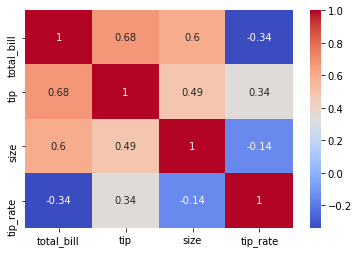

In [11]:
# cmap='coolwarm' : red means high correlation coefficient, and blue means low correlation coefficient
# annot=True : show correlation coefficient percentage

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Association(連関)

- Association : a correlation between two variables
- Observed frequency（観測度数） : some numbers in contingency table（分割表）
- Expected frequency（期待度数） : some numbers that have no association each other in contingency table

[![Image from Gyazo](https://i.gyazo.com/98f8c9a2ab58b0c0f22ce947871c6403.png)](https://gyazo.com/98f8c9a2ab58b0c0f22ce947871c6403)

# Chi squared（カイ二乗）

- the distance between observed frequency and expected frequency

$\begin{eqnarray} 
 \chi^2 = \sum^{a}_{i=1}\sum^{b}_{j=1}\frac{(n_{ij}-e_{ij})^2}{e_{ij}}\ \ \ \
 \end{eqnarray}$

$a$ : total number of lines of a contingency table（分割表の行の総数）

$b$ : total number of rows of a contingency table（分割表の列の総数）

$i$ : a particular number of line in a contingency table（分割表内の該当データの行数）

$j$ : a particularnumber of row in a contingency table（分割表内の該当データの列数）

$n_{ij}$ : a observed frequency of i line and j row（分割表のi行j列目の観測度数）

$e_{ij}$ : a expected frequency of i line and j row（分割表のi行j列目の期待度数）

But only chi squared, we're not sure whether there's association or not.
Because chi squared isn't standardized.

しかしカイ二乗値だけでは連関があるかどうか判断できない。
それはカイ二乗値が度数の取りうる値によっては大きくなったり、小さくなってしまうため。
その為カイ二乗値も標準化する必要がある。

## contingency table

In [12]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [16]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_tableable, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

First back(float) is chi squared.<br>
→10.277251918677742

And fouth back(array) is each expected frequencies.<br>
array([[ 43.75409836, 113.24590164],<br>
        [ 24.24590164,  62.75409836]]))


# Cramer's coefficient of association（クラメールの連関係数）

$V = \sqrt{\frac{\chi^2}{(\min(a,b)-1)N}}$

$min(a,b)$ : a number which is smaller line(a) or row(b)<br>
${\chi^2}$ : chi squared<br>
$N$ : total sample numbers

a chi squared that is standardized from 0 to 1.

In [30]:
# create chi squared function

def chi2(a, b):
    cont_table = pd.crosstab(a, b)
    c = stats.chi2_contingency(cont_table, correction=False)[0]
    return c

In [31]:
chi2(df['sex'], df['time'])

10.277251918677742

In [36]:
# N : total sample numbers

min_n = np.array(pd.crosstab(df['sex'], df['time'])) #クロス集計をnumpy化
n = min_n.sum() #総度数

In [39]:
min_n

array([[ 33, 124],
       [ 35,  52]])

In [44]:
len(min_n)

2

In [37]:
n

244

In [47]:
# create Cramer's coefficient of association function

def cramer(a, b):
    cont_table = pd.crosstab(a, b) #分割表
    ct_array = np.array(cont_table) #クロス集計
    n = ct_array.sum() #総度数
    chi_2 = stats.chi2_contingency(cont_table, correction=False)[0] #カイ二乗値
    m = min(cont_table.shape) #min(𝑎,𝑏)
    v = np.sqrt(chi_2/((m-1)*n))
    return v

In [46]:
cramer(df['sex'], df['time'])

0.20523129613344476